# Imports

In [ ]:
import rasterio
from rasterio.plot import show
from rasterio.warp import transform_geom
from rasterio.crs import CRS
import matplotlib
import matplotlib.pyplot as plt
import fiona
import numpy as np
import shapely 
from shapely.ops import unary_union
from shapely import Polygon, MultiPolygon 
import json

In [ ]:
from utilities.area import EARTH_RADIUS, get_density_per_area
from utilities.geojson import filter_features, filter_features_by_list, get_polygons
from utilities.plotting import get_projection_xticks, get_projection_yticks

## Boundary data
https://www.geoboundaries.org/countryDownloads.html 

United Kingdom

In [ ]:
london_boroughs = [
    'City of London', 'Westminster', 'Kensington and Chelsea', 'Hammersmith and Fulham', 'Wandsworth', 'Lambeth',
    'Southwark', 'Tower Hamlets', 'Hackney', 'Islington', 'Camden', 'Brent', 'Ealing', 'Hounslow', 'Richmond upon Thames',
    'Kingston upon Thames', 'Merton', 'Sutton', 'Croydon', 'Bromley', 'Lewisham', 'Greenwich', 'Bexley', 'Havering',
    'Barking and Dagenham', 'Redbridge', 'Newham', 'Waltham Forest','Haringey', 'Enfield', 'Barnet', 'Harrow',
    'Hillingdon'
]
inner_city_boroughs = [
    'Islington', 'Camden', 'Westminster', 'Southwark', 'Tower Hamlets', 'Hackney', 'Lambeth'
]

In [ ]:
geojson_filepath = 'data/geoBoundaries-GBR-ADM2-all/geoBoundaries-GBR-ADM2.geojson'
with open(geojson_filepath, 'r') as f:
    shape_data = json.load(f)
    
london_borough_features = filter_features_by_list(shape_data, 'shapeName', london_boroughs)
london_borough_polygons = get_polygons(london_borough_features, mainland=True)
inner_city_borough_features = filter_features_by_list(shape_data, 'shapeName', inner_city_boroughs)
inner_city_borough_polygons = get_polygons(inner_city_borough_features, mainland=True)

South Africa

In [ ]:
city_of_joburg_data = fiona.open("data/2018_Regions_CoJ/2018_Regions.shp", "r")
polygons = get_polygons(city_of_joburg_data, identifier='REGION_NAM')
city_of_joburg_projected = transform_geom(
    city_of_joburg_data.crs,
    rasterio.crs.CRS.from_epsg(4326),
    polygons.values()
)
city_of_joburg_polygons = dict(
    (name, Polygon(geom['coordinates'][0])) for name, geom in zip(polygons.keys(), city_of_joburg_projected)
)

France

In [ ]:
# for feat in shape_data['features']:
#     print(feat['properties']['shapeName'], end=', ')

In [ ]:
paris_departments = [
    'Paris', 'Val-de-Marne', 'Hauts-de-Seine', 'Seine-Saint-Denis'
]

In [ ]:
geojson_filepath = 'data/geoBoundaries-FRA-ADM2-all/geoBoundaries-FRA-ADM2.geojson'
with open(geojson_filepath, 'r') as f:
    shape_data = json.load(f)

In [ ]:
paris_department_features = filter_features_by_list(shape_data, 'shapeName', paris_departments)
paris_department_polygons = get_polygons(paris_department_features, mainland=True)
    
paris_feature = filter_features(shape_data, 'shapeName', 'Paris')
paris_polgyon = get_polygons(paris_feature, mainland=True)['Paris']

Manila, Philipines

In [ ]:
manila_divisons = [
    'NCR, City of Manila, First District', 'NCR, Second District', 'NCR, Third District', 'NCR, Fourth District'
]

In [ ]:
geojson_filepath = 'data/geoBoundaries-PHL-ADM2-all/geoBoundaries-PHL-ADM2.geojson'
with open(geojson_filepath, 'r') as f:
    shape_data = json.load(f)

In [ ]:
manila_divison_features = filter_features_by_list(shape_data, 'shapeName', manila_divisons)
print(len(manila_divison_features))
manila_divison_polygons = get_polygons(manila_divison_features, mainland=True)

New York, USA

- change second 'Richmond' to 'Richmond, NY'
- change second 'Kings' to 'Kings, NY'

In [ ]:
new_york_counties = ['New York', 'Bronx', 'Kings, NY', 'Queens', 'Richmond, NY']

In [ ]:
geojson_filepath = 'data/geoBoundaries-USA-ADM2-all/geoBoundaries-USA-ADM2.geojson'
with open(geojson_filepath, 'r') as f:
    shape_data = json.load(f)
new_york_features = filter_features_by_list(shape_data, 'shapeName', new_york_counties)
new_york_polygons = get_polygons(new_york_features)

Israel

In [ ]:
geojson_filepath = 'data/geoBoundaries-ISR-ADM2-all/geoBoundaries-ISR-ADM2.geojson'
with open(geojson_filepath, 'r') as f:
    shape_data = json.load(f)
israel_polygons = get_polygons(shape_data['features'], mainland=True)

Gaza

In [ ]:
gaza_strip_districts = [
    'Gaza', 'Khan Yunis', 'Rafah', 'North Gaza', 'Deir Al Balah'
]

In [ ]:
geojson_filepath = 'data/geoBoundaries-PSE-ADM2-all/geoBoundaries-PSE-ADM2.geojson'
with open(geojson_filepath, 'r') as f:
    shape_data = json.load(f)
gaza_features = filter_features_by_list(shape_data, 'shapeName', gaza_strip_districts)
gaza_polygons = get_polygons(gaza_features)

### Plotting

In [ ]:
admin_polygons = london_borough_polygons
region_name = 'London'

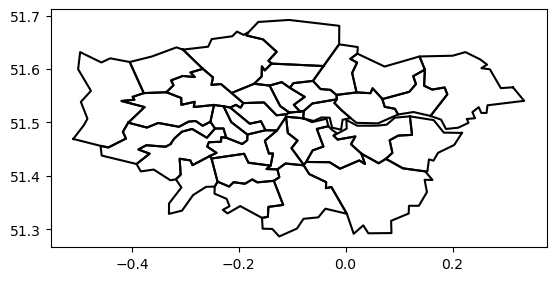

In [ ]:
fig, ax = plt.subplots()
for idx, shape in enumerate(admin_polygons.values()):
    if isinstance(shape, Polygon):
        polygon = shape
        xs, ys = polygon.exterior.coords.xy
        ax.plot(xs, ys, 'k-')
    elif isinstance(shape, MultiPolygon):
        for polygon in shape.geoms:
            xs, ys = polygon.exterior.coords.xy
            ax.plot(xs, ys, 'k-')
    else:
        print(f'Shape at idx {idx} is of type {type(shape)} is not supported')
ax.set_aspect('equal')
ax.plot();

In [ ]:
region_polygon = unary_union(list(admin_polygons.values()))

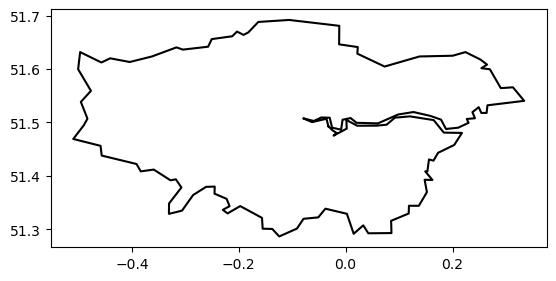

In [ ]:
fig, ax = plt.subplots()
if isinstance(region_polygon, Polygon):
    xs, ys = region_polygon.exterior.coords.xy
    ax.plot(xs, ys, 'k-');
elif isinstance(region_polygon, MultiPolygon):
    for polygon in region_polygon.geoms:
        xs, ys = polygon.exterior.coords.xy
        ax.plot(xs, ys, 'k-');
ax.set_aspect('equal')

## Reproject

reproject onto a transverse mercator to remove distortion (longitude lines stretched apart)

- https://pygis.io/docs/d_raster_crs_intro.html
- http://pygis.io/docs/d_understand_crs_codes.html

In [ ]:
long_min, lat_min, long_max, lat_max = region_polygon.bounds
long_avg = (long_min + long_max) / 2
long_avg

-0.087862460334735

In [ ]:
dst_crs = {
    'proj': 'tmerc',
    'lat_0': 0,
    'lon_0': long_avg,
    'k': 1/1000, # convert to km
    'x_0': 0,
    'y_0': 0,
    'ellps': 'WGS84',
    'units': 'm',
    'no_defs': True
}
src_crs = CRS.from_epsg(4326)

In [ ]:
polygons_dst = transform_geom(
    src_crs,
    dst_crs,
    admin_polygons.values()
)
polygons_dst = dict(
    (name, Polygon(geom['coordinates'][0])) for name, geom in zip(admin_polygons.keys(), polygons_dst)
)

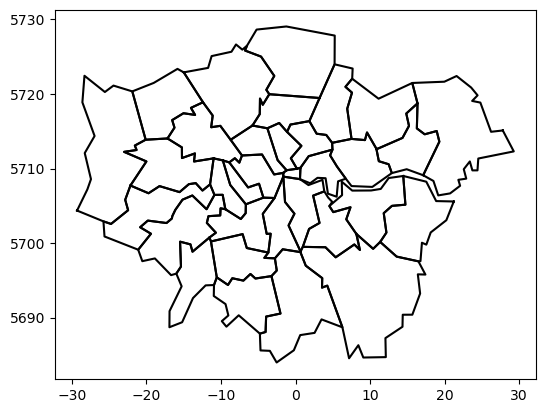

In [ ]:
fig, ax = plt.subplots()
for idx, shape in enumerate(polygons_dst.values()):
    if isinstance(shape, Polygon):
        polygon = shape
        xs, ys = polygon.exterior.coords.xy
        ax.plot(xs, ys, 'k-')
    elif isinstance(shape, MultiPolygon):
        for polygon in shape.geoms:
            xs, ys = polygon.exterior.coords.xy
            ax.plot(xs, ys, 'k-')
    else:
        print(f'Shape at idx {idx} is of type {type(shape)} is not supported')
ax.set_aspect('equal')
ax.plot();

## Population Data

https://rasterio.readthedocs.io/en/latest/quickstart.html

https://hub.worldpop.org/geodata/listing?id=78

In [ ]:
raster_filepath = 'data/gbr_ppp_2020_constrained.tif' # Great Britain count / 100m
#raster_filepath = 'data/gbr_pd_2020_1km_UNadj.tif' # Great Britain density / 1km
#raster_filepath = 'data/zaf_ppp_2020_constrained.tif' # South Africa
#raster_filepath = 'data/fra_ppp_2020_constrained.tif' # France
#raster_filepath = 'data/phl_ppp_2020_constrained.tif' # Philipines
#raster_filepath = 'data/usa_ppp_2020_constrained.tif' # USA
#raster_filepath = 'data/isr_ppp_2020_constrained.tif' # Israel

In [ ]:
with rasterio.open(raster_filepath) as src:
    densities, populations_counts, areas = get_density_per_area(src, admin_polygons.values())
print(f'populations_count: {populations_counts.sum():,.2f}')
print(f'area: {areas.sum()/1e6:,.2f} km^2')
print(f'density: {densities.max():,.2f} people / km^2')

populations_count: 9,187,436.63
area: 1,577.36 km^2
density: 16,033.42 people / km^2


In [ ]:
for (name, density, pop) in zip(admin_polygons.keys(), densities, populations_counts):
    print(f'{name} : {pop:,.0f} people: {density:.2f} people/km^2')

City of London : 3,738 people: 1496.69 people/km^2
Barking and Dagenham : 215,816 people: 5865.34 people/km^2
Barnet : 396,698 people: 4594.01 people/km^2
Bexley : 237,836 people: 3950.03 people/km^2
Brent : 372,695 people: 8466.59 people/km^2
Bromley : 327,410 people: 2187.38 people/km^2
Camden : 234,732 people: 11071.90 people/km^2
Croydon : 391,623 people: 4569.65 people/km^2
Ealing : 363,294 people: 6662.30 people/km^2
Enfield : 354,982 people: 4290.48 people/km^2
Greenwich : 291,879 people: 6149.50 people/km^2
Hackney : 299,252 people: 15139.57 people/km^2
Hammersmith and Fulham : 205,193 people: 11707.34 people/km^2
Haringey : 288,864 people: 10116.65 people/km^2
Harrow : 273,695 people: 5302.73 people/km^2
Havering : 249,263 people: 2197.60 people/km^2
Hillingdon : 312,777 people: 2716.51 people/km^2
Hounslow : 296,252 people: 5398.83 people/km^2
Islington : 242,125 people: 16033.42 people/km^2
Kensington and Chelsea : 151,047 people: 12952.29 people/km^2
Kingston upon Thames : 

## Clip to region of intersest

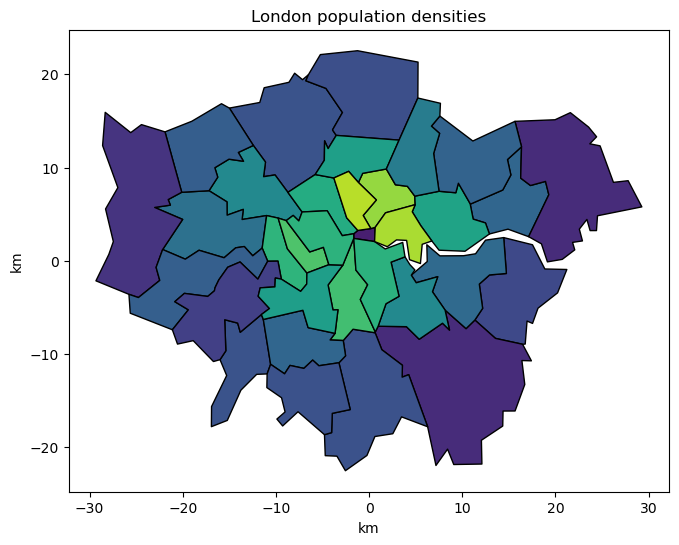

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
vmax = 18_000
ax.set_title(f'{region_name} population densities')

patches = []
colors = []
x_min, y_min, x_max, y_max = MultiPolygon(polygons_dst.values()).bounds
y_mid = (y_min + y_max) / 2
origin = np.array((0.0, y_mid))
for polygon in polygons_dst.values(): 
    polygon = polygon.exterior.coords
    polygon -= origin
    patches.append(matplotlib.patches.Polygon(polygon))
        
p = matplotlib.collections.PatchCollection(patches, edgecolor='k')
colors = densities
p.set_array(colors)
p.set_clim(0, vmax)
ax.add_collection(p)
ax.autoscale()
ax.set_aspect('equal')
ax.set_xlabel('km')
ax.set_ylabel('km');

In [ ]:
#fig.savefig('densities_district.png', bbox_inches="tight")

## Compare to another city

In [ ]:
other_polygons = new_york_polygons
other_name = 'New York'

In [ ]:
other_raster_filepath = 'data/usa_ppp_2020_constrained.tif' # population counts
with rasterio.open(other_raster_filepath) as src:
    other_densities, other_populations, other_areas = get_density_per_area(src, other_polygons.values())    
other_densities.max()

18299.695881099917

In [ ]:
other_region = MultiPolygon(list(other_polygons.values()))
other_long_min, other_lat_min, other_long_max, other_lat_max = other_region.bounds
other_long_avg = (other_long_min + other_long_max) / 2
other_crs = {
    'proj': 'tmerc',
    'lat_0': 0,
    'lon_0': other_long_avg,
    'k': 1/1000, # convert to km
    'x_0': 0,
    'y_0': 0,
    'ellps': 'WGS84',
    'units': 'm',
    'no_defs': True
}
src_crs = CRS.from_epsg(4326)

In [ ]:
other_polygons_dst = transform_geom(
    src_crs,
    other_crs,
    other_polygons.values()
)
other_polygons_dst = dict(
    (name, Polygon(geom['coordinates'][0])) for name, geom in zip(other_polygons.keys(), other_polygons_dst)
)

In [ ]:
other_x_min, other_y_min, other_x_max, other_y_max = MultiPolygon(other_polygons_dst.values()).bounds
other_y_mid = (other_y_min + other_y_max) / 2
origin_other = np.array((0, other_y_mid))
offset = np.array((-60, 0))

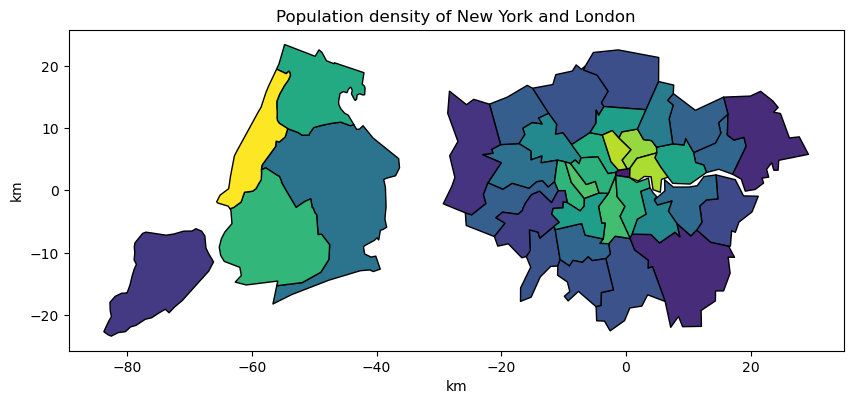

In [ ]:
#fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title(f'Population density of {other_name} and {region_name}')

patches = []
colors = []
for polygon in other_polygons_dst.values(): 
    polygon = polygon.exterior.coords - origin_other + offset
    patches.append(matplotlib.patches.Polygon(polygon))
    
p = matplotlib.collections.PatchCollection(patches, edgecolor='k', linewidth=1, linestyle="-")
#colors = 100 * np.random.rand(len(patches))
colors = other_densities
p.set_array(colors)
p.set_clim(0, vmax)
ax.add_collection(p)
ax.autoscale()
ax.set_aspect('equal')
fig

### Annotate

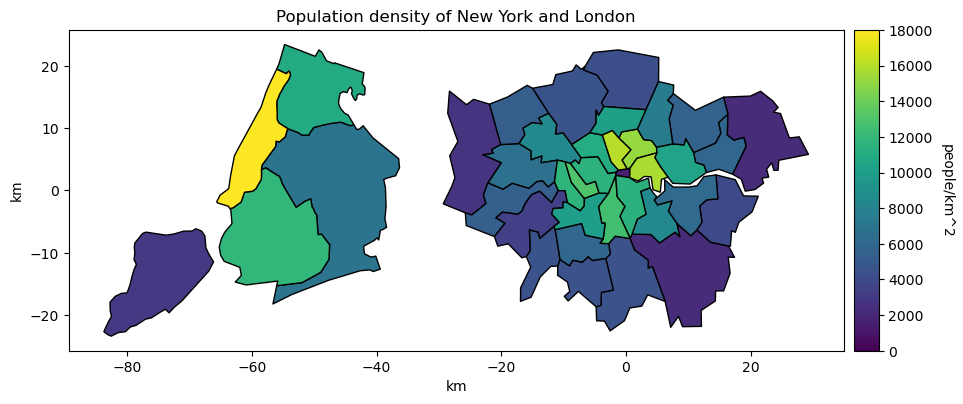

In [ ]:
#fig.colorbar(axis_image)
cbar_axis = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.025,ax.get_position().height])
cbar = fig.colorbar(p, cbar_axis)
cbar.set_label('people/km^2', rotation=270, labelpad=15) # density
fig

In [ ]:
fig.savefig('london_ny_densities_districts.png', bbox_inches="tight")